In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
df = pd.read_csv("/content/walmart-sales-dataset-of-45stores.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

company_df = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
company_df = company_df.sort_values('Date')

In [4]:
train = company_df.iloc[:-12]
test = company_df.iloc[-12:]

In [5]:
model = SARIMAX(
    train['Weekly_Sales'],
    order=(1,1,1),
    seasonal_order=(1,1,1,52),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()
results.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  131
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -382.780
Date:                            Fri, 30 Jan 2026   AIC                            775.560
Time:                                    06:53:13   BIC                            781.450
Sample:                                         0   HQIC                           777.123
                                            - 131                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0166      0.562      0.030      0.976      -1.085       1.119
ma.L1         -0.9273      0.397     -2.336      0.019      -1.705      -0.149
ar.S.L52      -0.0173     34.277     -0.001      1.000     -67.199      67.164
ma.S.L52       0.0062     34.121      0.000      1.000     -66.869      66.881
sigma2      4.492e+12   9.95e-10   4.52e+21      0.000    4.49e+12    4.49e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.42
Prob(Q):                              0.96   Prob(JB):                         0.01
Heteroskedasticity (H):               0.40   Skew:                             0.42
Prob(H) (two-sided):                  0.22   Kurtosis:                         5.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  9e+36. Standard errors may be unstable.
"""

In [6]:
sarima_forecast = results.forecast(steps=12)

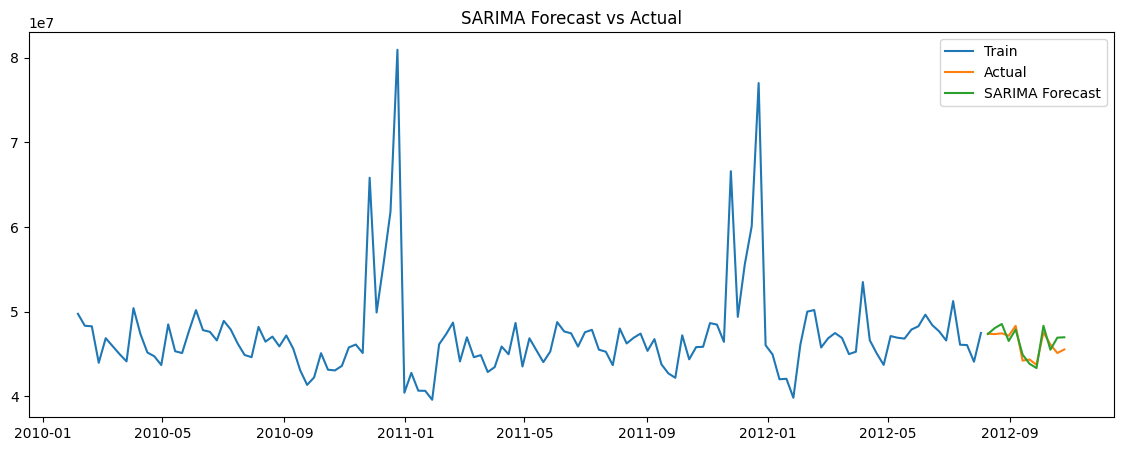

In [7]:
plt.figure(figsize=(14,5))
plt.plot(train['Date'], train['Weekly_Sales'], label="Train")
plt.plot(test['Date'], test['Weekly_Sales'], label="Actual")
plt.plot(test['Date'], sarima_forecast, label="SARIMA Forecast")
plt.legend()
plt.title("SARIMA Forecast vs Actual")
plt.show()